<a href="https://colab.research.google.com/github/axel-sirota/statistical-thikning-python/blob/main/Module3Demo_Spread_Measurements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis with Online Retail II Dataset

## Introduction


In this notebook, we will perform exploratory data analysis (EDA) on the Online Retail II Dataset. We will analyze the price statistics, visualize price distributions, and explore the mean price per country with confidence intervals.

## Data Loading and Preprocessing
We start by loading the dataset and performing data preprocessing steps.

In [ ]:
# Step 1: Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
%%writefile get_data.sh

wget -O retail.csv https://www.dropbox.com/scl/fi/3e467uu1fphdqhksw3pxl/online_retail_II_short.csv?rlkey=ordsuy8wacohms5g7bl084x5u&dl=0

Overwriting get_data.sh


In [ ]:
!bash get_data.sh

--2024-03-16 16:27:23--  https://www.dropbox.com/scl/fi/3e467uu1fphdqhksw3pxl/online_retail_II_short.csv?rlkey=ordsuy8wacohms5g7bl084x5u
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0725ee0016e3cdcf234276453e.dl.dropboxusercontent.com/cd/0/inline/CPPeEPqHWJbGktpjaZ3moL4Fghui08Q1Vm7MMVWEEz-UFjtQptxQijcgU2TxwOgKoB6RAqsxZsqztMT4qjKrCYGoLiJs6pKv0r5GKyet1Dr0xgJuoWb8o6xD7fjcZyz3nk8Pg3La7Z-P5_VUtjnLBXbh/file# [following]
--2024-03-16 16:27:24--  https://uc0725ee0016e3cdcf234276453e.dl.dropboxusercontent.com/cd/0/inline/CPPeEPqHWJbGktpjaZ3moL4Fghui08Q1Vm7MMVWEEz-UFjtQptxQijcgU2TxwOgKoB6RAqsxZsqztMT4qjKrCYGoLiJs6pKv0r5GKyet1Dr0xgJuoWb8o6xD7fjcZyz3nk8Pg3La7Z-P5_VUtjnLBXbh/file
Resolving uc0725ee0016e3cdcf234276453e.dl.dropboxusercontent.com (uc0725ee0016e3cdcf234276453e.dl.dropboxusercontent.com)... 162.12

In [ ]:
import csv
csv_file = 'retail.csv'
# data = np.genfromtxt(csv_file, delimiter=',', dtype=str)
data = []
with open(csv_file, 'r', encoding='utf-8') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  # Skip header row
    for row in csv_reader:
        data.append(row)

# Convert data to a NumPy array
data = np.array(data)


In [ ]:
data

array([['489434', '85048', '15CM CHRISTMAS GLASS BALL 20 LIGHTS', ...,
        '6.95', '13085', 'United Kingdom'],
       ['489434', '79323P', 'PINK CHERRY LIGHTS', ..., '6.75', '13085',
        'United Kingdom'],
       ['489434', '79323W', ' WHITE CHERRY LIGHTS', ..., '6.75', '13085',
        'United Kingdom'],
       ...,
       ['489856', '82613B', 'METAL SIGN,CUPCAKE SINGLE HOOK', ...,
        '2.57', '', 'United Kingdom'],
       ['489856', '82613C', 'METAL SIGN,CUPCAKE SINGLE HOOK', ...,
        '2.57', '', 'United Kingdom'],
       ['489856', '82613D', 'METAL SIGN CUPCAKE SINGLE HOOK', ...,
        '2.57', '', 'United Kingdom']], dtype='<U35')

## Boxplots

Now let's verify the boxplot usage to data cleaning

[]

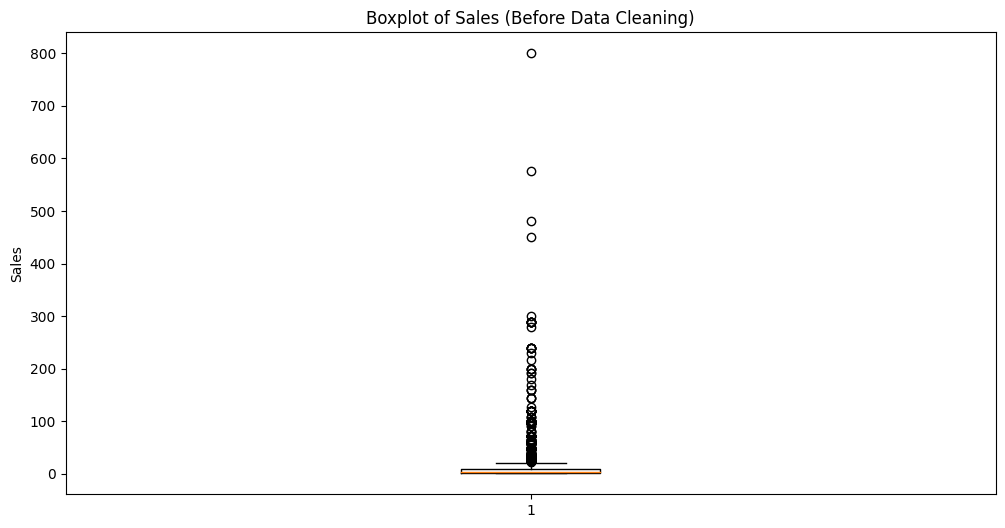

In [ ]:
quantities = data[:, 3].astype(int)
plt.figure(figsize=(12, 6))
plt.boxplot(quantities)
plt.title('Boxplot of Sales (Before Data Cleaning)')
plt.ylabel('Sales')
plt.plot()


[]

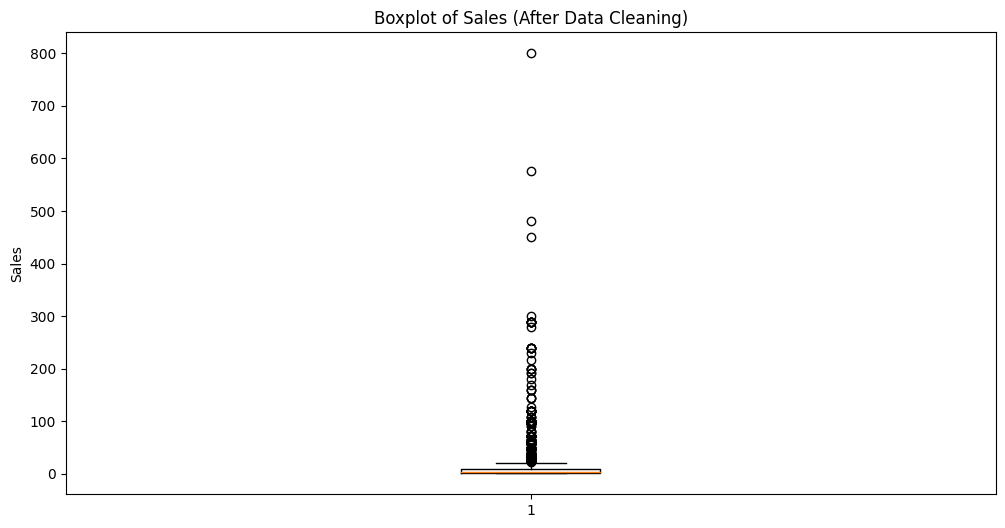

In [ ]:
data = data[data[:, 3].astype(int) > 0]

quantities = data[:, 3].astype(int)
plt.figure(figsize=(12, 6))
plt.boxplot(quantities)
plt.title('Boxplot of Sales (After Data Cleaning)')
plt.ylabel('Sales')
plt.plot()

## Calculate Spread Measurements on Price

Let's analyse the Price distribution, some spread measurements and how the represent the price of all transactions

In [ ]:

# Extract prices, countries, and quantities from the dataset
prices = data[:, 5].astype(float)
countries = data[:, 7]
quantities = data[:, 3].astype(int)

# Calculate range, variance, standard deviation, and percentiles for Price
price_range = np.ptp(prices)
price_variance = np.var(prices)
price_std_deviation = np.std(prices)
price_percentiles = np.percentile(prices, [25, 50, 75])

print("Price Range:", price_range)
print("Price Variance:", price_variance)
print("Price Standard Deviation:", price_std_deviation)
print("25th, 50th, and 75th Percentiles of Price:", price_percentiles)


Price Range: 647.19
Price Variance: 117.26447778927236
Price Standard Deviation: 10.828872415412066
25th, 50th, and 75th Percentiles of Price: [1.25 2.55 4.95]


[]

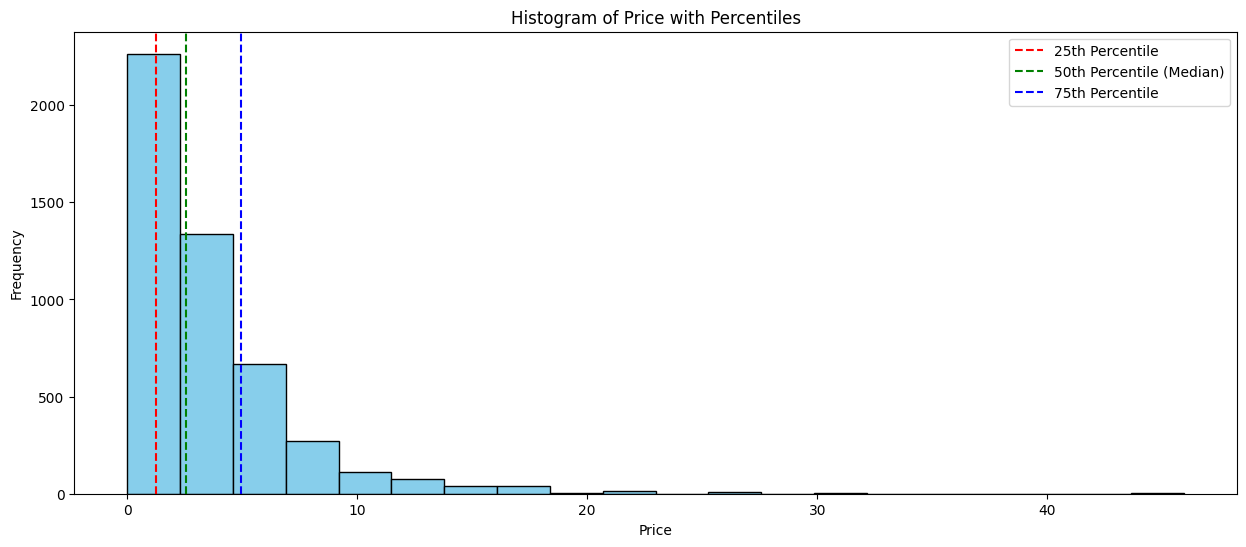

In [ ]:
plt.figure(figsize=(15,6))
plt.hist(prices[prices < 50], bins=20, color='skyblue', edgecolor='black')
plt.axvline(price_percentiles[0], color='red', linestyle='--', label='25th Percentile')
plt.axvline(price_percentiles[1], color='green', linestyle='--', label='50th Percentile (Median)')
plt.axvline(price_percentiles[2], color='blue', linestyle='--', label='75th Percentile')
plt.title('Histogram of Price with Percentiles')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.plot()

## Merging together Centrality and Spread Measurements

Finally we will merge everything into the price per country, filtering high prices, and calculating some idea of interval where the price lies as the mean ± the standard deviation.

In [ ]:
mean_price_per_country = {}
std_deviation_per_country = {}
prices = prices[prices < 15]
countries = data[:, 7][data[:, 5].astype(float) < 15]
for country in np.unique(countries):
    country_prices = prices[countries == country]
    mean_price_per_country[country] = np.mean(country_prices)
    std_deviation_per_country[country] = np.std(country_prices)

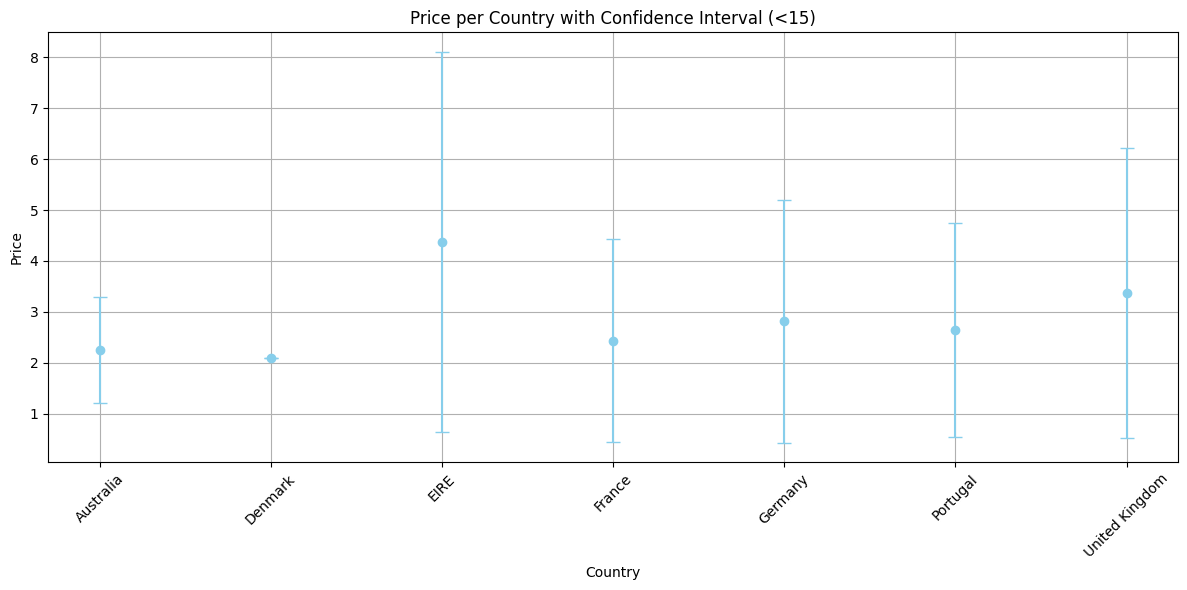

In [ ]:
std_deviation_values = list(std_deviation_per_country.values())

# Plot price per country with error bars representing confidence interval (mean +- std deviation)
plt.figure(figsize=(12, 6))
plt.errorbar(mean_price_per_country.keys(), mean_price_per_country.values(), yerr=std_deviation_values, fmt='o', color='skyblue', capsize=5)
plt.title('Price per Country with Confidence Interval (<15)')
plt.xlabel('Country')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusions

Overall, this analysis provides valuable insights into the pricing dynamics of the online retail business. Further analysis could explore correlations between prices and other variables, such as quantities sold or customer demographics, to gain deeper insights into consumer behavior and market trends.